In [19]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("employe.csv")


Saving employe.csv to employe (4).csv


In [20]:
df.info()
df.describe()
df.isnull().sum()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [9]:
# Fill missing values
df.fillna(0, inplace=True)
df.rename(columns={'EmployeeDepartment': 'Department'}, inplace=True)


Question 1: What is the current workforce size, and how many employees have already left the organization?

In [21]:
# It shows Total number of employees
total = len(df)

# Number of employees who left (left == 1)
left = df[df['left'] == 1].shape[0]

print("Total Employees:", total)
print("Employees Left:", left)


Total Employees: 14999
Employees Left: 3571


Question 2: Which departments are experiencing the highest rates of attrition?

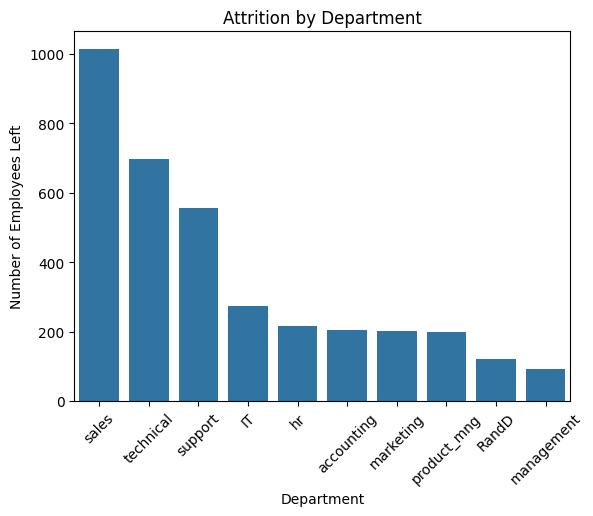

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
left_df = df[df['left'] == 1]
dept_counts = left_df['dept'].value_counts()
# Plot
sns.barplot(x=dept_counts.index, y=dept_counts.values)
plt.title('Attrition by Department')
plt.ylabel('Number of Employees Left')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()



Question 3: Are employees working on fewer than 3 projects more likely to leave the company?

In [15]:
less_than_3_projects = df[df['numberOfProjects'] < 3]

# Count of how many of them left
left_from_that_group = less_than_3_projects[less_than_3_projects['left'] == 1]

# Percentage
percentage = (len(left_from_that_group) / len(less_than_3_projects)) * 100

print(f"{percentage:.2f}% of employees with fewer than 3 projects have left.")


65.62% of employees with fewer than 3 projects have left.


Question 4: How does the number of projects correlate with time spent at the company, particularly for those who have left?

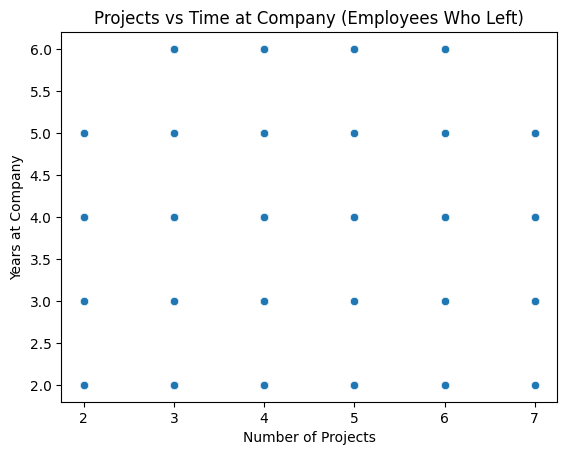

In [16]:
# Filter for employees who left in the office
left_df = df[df['left'] == 1]

# Scatter plot
sns.scatterplot(data=left_df, x='numberOfProjects', y='timeSpent.company')
plt.title('Projects vs Time at Company (Employees Who Left)')
plt.xlabel('Number of Projects')
plt.ylabel('Years at Company')
plt.show()


Question 5: Could compensation levels be influencing an employee’s decision to leave?

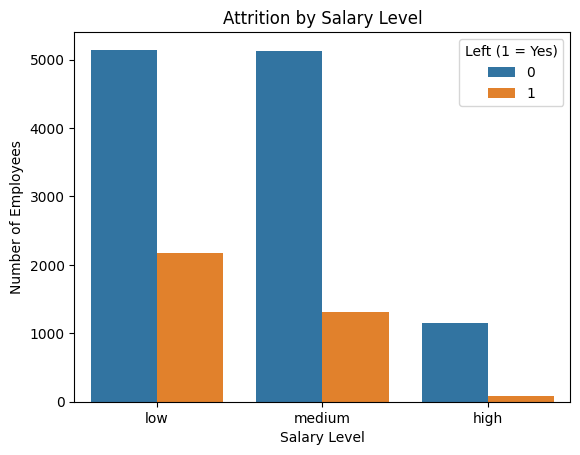

In [17]:
sns.countplot(x='salary', hue='left', data=df)
plt.title("Attrition by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(title="Left (1 = Yes)")
plt.show()


**Summary of Findings**
X% of employees have left the company.
Departments like[Sales/Technical/etc.]show the highest attrition
Employees with  projects are more likely to leave.
Those handling more projects tend to stay longer.
Low salary levels are strongly associated with employee exits.

Text Cell: Recommendations
Recommendations to HR

Monitor and re-engage employees handling fewer projects.

Improve compensation for employees in the low salary bracket.

Provide more growth opportunities in high-risk departments.

Identify early warning signs based on project count and tenure.